In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gp.get_library_name(organism="human")

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [63]:
ac_gene_df = pd.read_csv("/mnt/c/Users/ouyangkang/Downloads/exclude_RNA_MT_neu.csv")
ac_gene_df = ac_gene_df.sort_values(by=["pvals_adj"])
ac_gene_df.reset_index()

,index,BC_1,logFC,pvals,pvals_adj
0,7727,FCGR2A,-6.340320,0.000000,0.000000
1,7708,LYST,-10.442104,0.000000,0.000000
2,7707,RESF1,-8.457747,0.000000,0.000000
3,7738,CELF2,-9.343809,0.000000,0.000000
4,7737,SLC6A6,-5.283535,0.000000,0.000000
...,...,...,...,...,...
7792,6,RIMS2,-22.293402,0.000326,0.000987
7793,7,AL162458.1,-22.293402,0.000326,0.000987
7794,5,CBR3-AS1,-22.293402,0.000326,0.000987
7795,9,SMIM3,-2.644770,0.000326,0.000988


In [64]:
up_gene = ac_gene_df[ac_gene_df["logFC"] > 0] 
up_gene

,BC_1,logFC,pvals,pvals_adj
0,XIST,9.553772,2.188313e-21,1.711737e-20
1,SNHG5,1.738331,6.852572e-20,5.150663e-19
2,KNL1,2.573382,6.724612e-05,2.240785e-04
3,RPL39,1.804960,1.145124e-04,3.708511e-04


In [65]:
down_gene = ac_gene_df[ac_gene_df["logFC"] < 0]
down_gene

,BC_1,logFC,pvals,pvals_adj
7727,FCGR2A,-6.340320,0.000000,0.000000
7708,LYST,-10.442104,0.000000,0.000000
7707,RESF1,-8.457747,0.000000,0.000000
7738,CELF2,-9.343809,0.000000,0.000000
7737,SLC6A6,-5.283535,0.000000,0.000000
...,...,...,...,...
6,RIMS2,-22.293402,0.000326,0.000987
7,AL162458.1,-22.293402,0.000326,0.000987
5,CBR3-AS1,-22.293402,0.000326,0.000987
9,SMIM3,-2.644770,0.000326,0.000988


In [68]:
gene_list = down_gene.BC_1.tolist()[0:99]

In [69]:
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)

In [70]:
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Intracellular Signal Transductio...,10/297,0.000002,0.002337,0,0,7.678816,100.109998,LYN;PREX1;RASSF2;DOCK8;LRRK2;TMSB4X;ARAP1;ARHG...
1,GO_Biological_Process_2023,Negative Regulation Of MAP Kinase Activity (GO...,5/51,0.000005,0.002824,0,0,22.959066,279.061405,LYN;RGS2;DUSP1;PTPRJ;SORL1
2,GO_Biological_Process_2023,Regulation Of MAP Kinase Activity (GO:0043405),6/114,0.000022,0.005981,0,0,11.823775,126.871328,LYN;RGS2;DUSP1;LRRK2;PTPRJ;SORL1
3,GO_Biological_Process_2023,Cellular Response To Cytokine Stimulus (GO:007...,9/308,0.000022,0.005981,0,0,6.555853,70.220618,RIPOR2;HCK;CSF3R;DUSP1;DOCK8;IRF1;LRRK2;PTPRJ;...
4,GO_Biological_Process_2023,Response To Chemokine (GO:1990868),3/13,0.000032,0.006965,0,0,62.159375,642.455172,RIPOR2;DUSP1;DOCK8


In [57]:
enr.results.to_csv("/mnt/c/Users/ouyangkang/Desktop/neu_EnrighchGO.csv", index=None)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


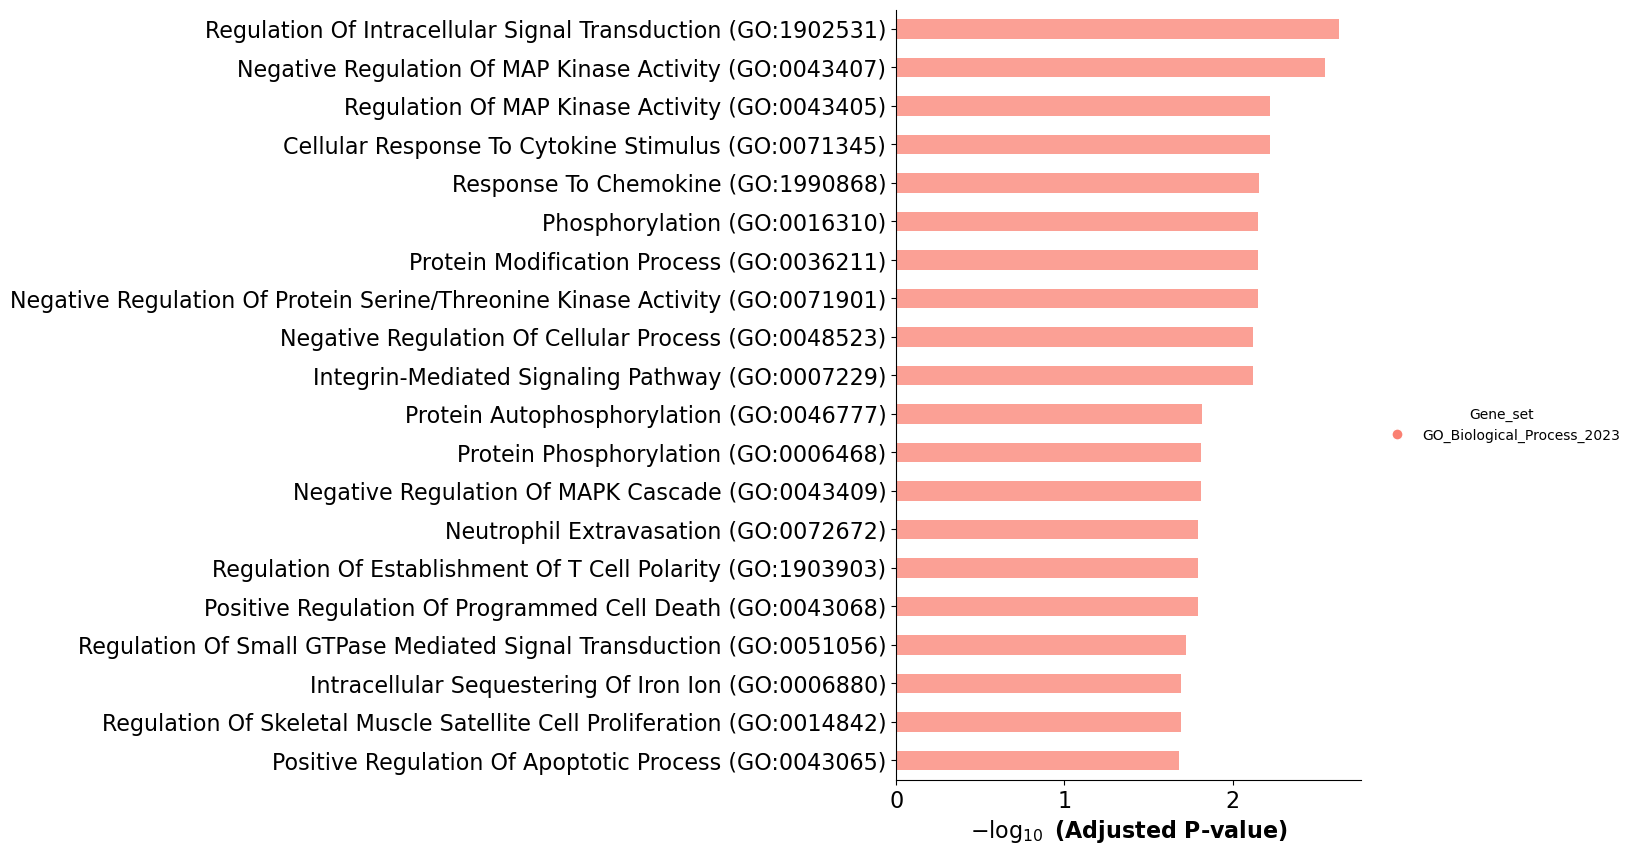

In [71]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10),
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


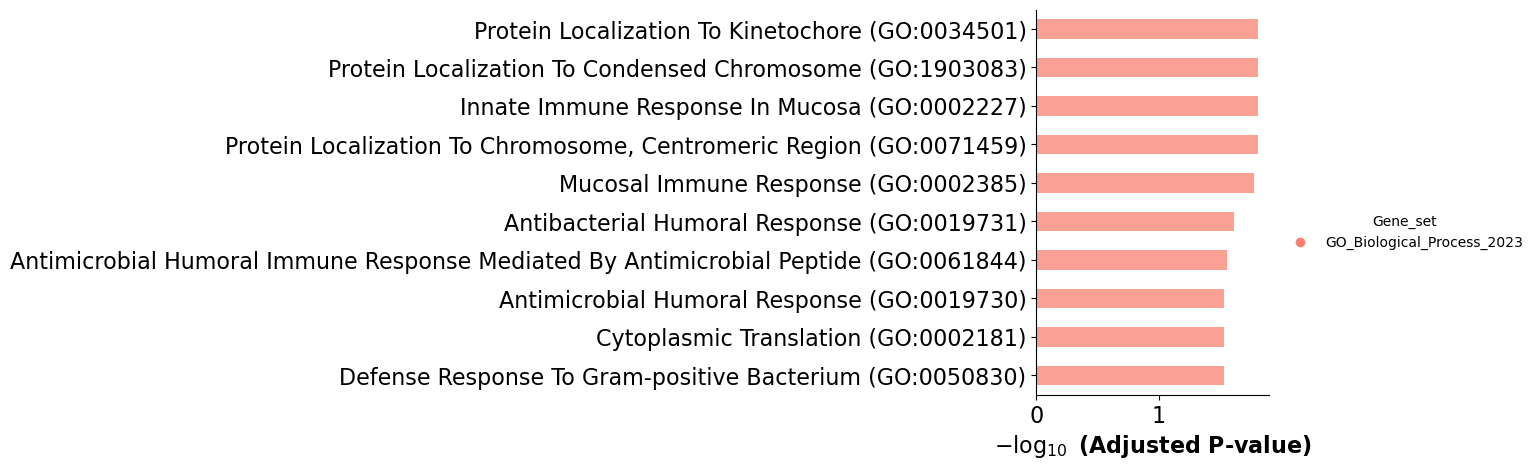

In [72]:
gene_list = up_gene.BC_1.tolist()
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets="GO_Biological_Process_2023",
                 organism="human",
                 outdir=None)

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5)
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )